In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

# From tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Import Sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


In [2]:
files=glob('C:\\Users\\Aaron\\Downloads\\Fish_Dataset\\Fish_Dataset\\*\\*\\*')

In [3]:
len(files)

18000

In [4]:
files[:3]

['C:\\Users\\Aaron\\Downloads\\Fish_Dataset\\Fish_Dataset\\Black Sea Sprat\\Black Sea Sprat\\00001.png',
 'C:\\Users\\Aaron\\Downloads\\Fish_Dataset\\Fish_Dataset\\Black Sea Sprat\\Black Sea Sprat\\00002.png',
 'C:\\Users\\Aaron\\Downloads\\Fish_Dataset\\Fish_Dataset\\Black Sea Sprat\\Black Sea Sprat\\00003.png']

In [5]:
File_Path = pd.Series(files).astype(str)

In [6]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],files))
Labels = pd.Series(Labels)

In [7]:
Labels[:2]

0    Black Sea Sprat
1    Black Sea Sprat
dtype: object

In [8]:
df = pd.concat([File_Path,Labels],axis=1)
df.columns = ['image', 'label']
df

,image,label
0,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
1,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
2,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
3,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
4,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
...,...,...
17995,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout GT
17996,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout GT
17997,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout GT
17998,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout GT


In [9]:
# get rid of GT pictures and just keep the RGB photos
df = df[df["label"].apply(lambda x: x[-2:] != "GT")].reset_index(drop=True)
df

,image,label
0,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
1,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
2,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
3,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
4,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Black Sea Sprat
...,...,...
8995,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout
8996,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout
8997,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout
8998,C:\Users\Aaron\Downloads\Fish_Dataset\Fish_Dat...,Trout


In [10]:
# checking to make sure that we have 9 x 1000 images, 1000 for each class
df.label.value_counts()

Red Sea Bream         1000
Striped Red Mullet    1000
Black Sea Sprat       1000
Trout                 1000
Sea Bass              1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Shrimp                1000
Red Mullet            1000
Name: label, dtype: int64

In [11]:
# Split the dataset into training, crossvalidation, and test sets
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(5760, 2)
(1800, 2)
(1440, 2)


In [12]:
# convert all images to grayscale
img_gen = ImageDataGenerator(rescale = 1./255)

In [13]:
# resize images to 200x200
train = img_gen.flow_from_dataframe(dataframe=x_train, 
                                                 x_col='image', y_col='label', 
                                                 target_size=(200,200), color_mode='rgb', 
                                                 class_mode='categorical', shuffle=False)

test = img_gen.flow_from_dataframe(dataframe=x_test, 
                                                x_col='image', y_col='label', 
                                                target_size=(200,200), color_mode='rgb', 
                                                class_mode='categorical', shuffle=False)
val = img_gen.flow_from_dataframe(dataframe=x_val,
                                               x_col='image', y_col='label', 
                                               target_size=(200,200), color_mode='rgb', 
                                               class_mode='categorical',shuffle=False)

Found 5760 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.


# CNN Model Training and Results

In [14]:
input_shape=(200,200,3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 16)        2

In [15]:
model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=['accuracy'])

In [16]:
CNN_history = model.fit(train, validation_data=val, epochs=15)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 180 steps, validate for 45 steps
Epoch 1/15
180/180 [==============================] - 214s 1s/step - loss: 1.7294 - accuracy: 0.3253 - val_loss: 1.1319 - val_accuracy: 0.5778
Epoch 2/15
180/180 [==============================] - 115s 640ms/step - loss: 0.9051 - accuracy: 0.6620 - val_loss: 0.6837 - val_accuracy: 0.7444
Epoch 3/15
180/180 [==============================] - 113s 629ms/step - loss: 0.4980 - accuracy: 0.8229 - val_loss: 0.4514 - val_accuracy: 0.8382
Epoch 4/15
180/180 [==============================] - 112s 621ms/step - loss: 0.2851 - accuracy: 0.9012 - val_loss: 0.1824 - val_accuracy: 0.9431
Epoch 5/15
180/180 [==============================] - 112s 621ms/step - loss: 0.1604 - accuracy: 0.9453 - val_loss: 0.3041 - val_accuracy: 0.8917
Epoch 6/15
180/180 [==============================] - 111s 615ms/step - loss: 0.1374 - accuracy: 0.9535 - val_loss: 0.1427 - val_accuracy: 0.9528
Epoch 7/15
180/180 [==============

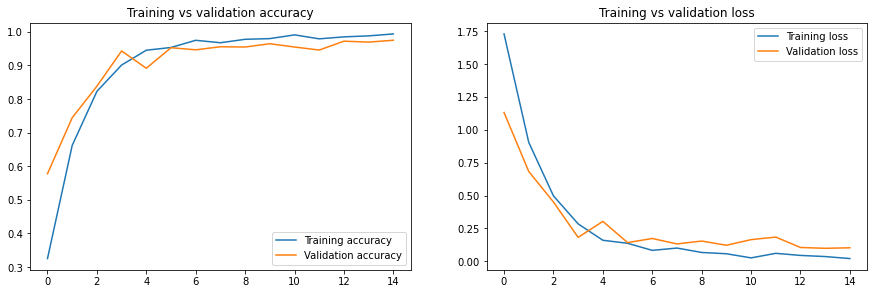

In [17]:
accuracy = CNN_history.history['accuracy']
val_accuracy  = CNN_history.history['val_accuracy']

loss = CNN_history.history['loss']
val_loss = CNN_history.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [18]:
pred = model.predict(test)
pred = np.argmax(pred,axis = 1)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

accuracy_score(test.labels, pred)

0.9683333333333334

[]

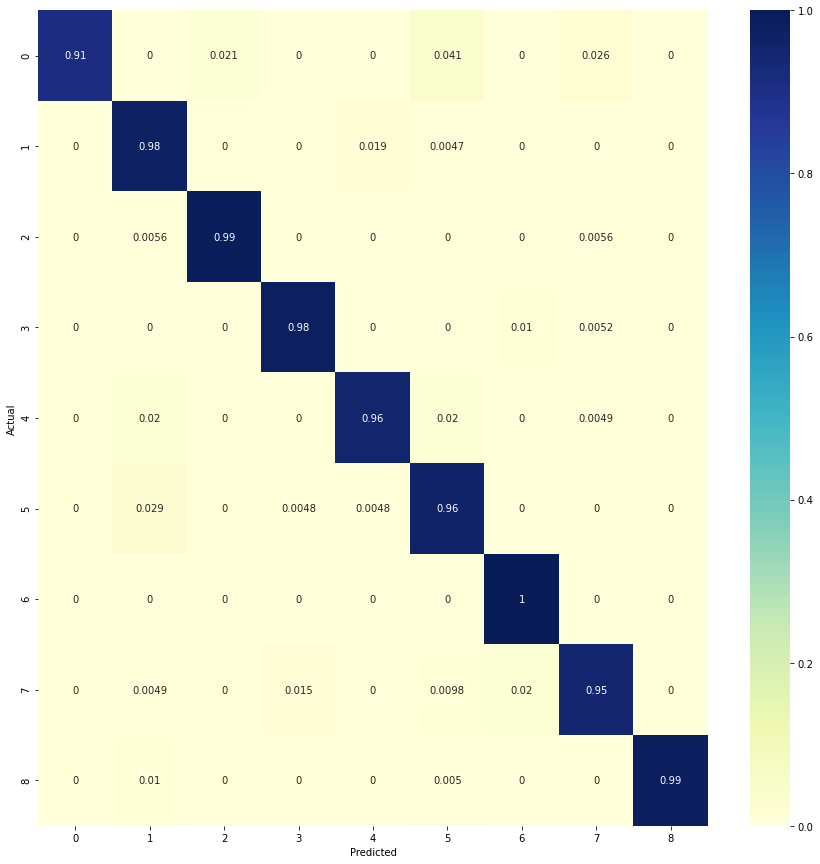

In [20]:
confusion_mtx = confusion_matrix(test.labels, pred, normalize="true") 
plt.figure(figsize=(15,15))
sns.heatmap(confusion_mtx,annot=True,annot_kws={"size": 10} , cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot()

In [21]:
print(classification_report(test.labels,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       195
           1       0.94      0.98      0.96       211
           2       0.98      0.99      0.98       179
           3       0.98      0.98      0.98       191
           4       0.97      0.96      0.97       203
           5       0.93      0.96      0.94       207
           6       0.97      1.00      0.99       209
           7       0.96      0.95      0.96       204
           8       1.00      0.99      0.99       201

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



# MLP Model Training and Results

In [22]:
# I like working with symmetrical MLP models
input_shape=(200,200,3)
MLP_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(9, activation='softmax')
])

MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               61440512  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [23]:
MLP_model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=['accuracy'])

In [24]:
MLP_history = MLP_model.fit(train, validation_data=val, epochs=15)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 180 steps, validate for 45 steps
Epoch 1/15
180/180 [==============================] - 109s 603ms/step - loss: 2.3616 - accuracy: 0.2311 - val_loss: 2.8016 - val_accuracy: 0.2146
Epoch 2/15
180/180 [==============================] - 105s 586ms/step - loss: 1.8988 - accuracy: 0.3319 - val_loss: 1.4542 - val_accuracy: 0.4465
Epoch 3/15
180/180 [==============================] - 106s 587ms/step - loss: 1.5158 - accuracy: 0.4568 - val_loss: 1.2128 - val_accuracy: 0.5500
Epoch 4/15
180/180 [==============================] - 105s 584ms/step - loss: 1.2321 - accuracy: 0.5606 - val_loss: 1.0466 - val_accuracy: 0.6278
Epoch 5/15
180/180 [==============================] - 105s 582ms/step - loss: 0.9984 - accuracy: 0.6462 - val_loss: 1.0704 - val_accuracy: 0.6396
Epoch 6/15
180/180 [==============================] - 105s 585ms/step - loss: 0.8227 - accuracy: 0.7115 - val_loss: 0.7894 - val_accuracy: 0.7326
Epoch 7/15
180/180 [===========

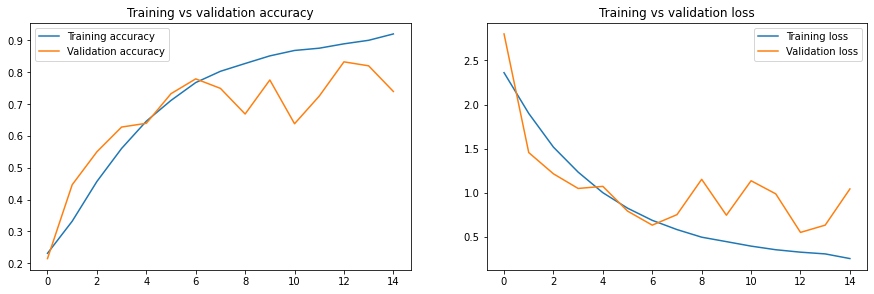

In [25]:
accuracy = MLP_history.history['accuracy']
val_accuracy  = MLP_history.history['val_accuracy']

loss = MLP_history.history['loss']
val_loss = MLP_history.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [26]:
pred = MLP_model.predict(test)
pred = np.argmax(pred,axis = 1)

In [27]:
accuracy_score(test.labels, pred)

0.76

[]

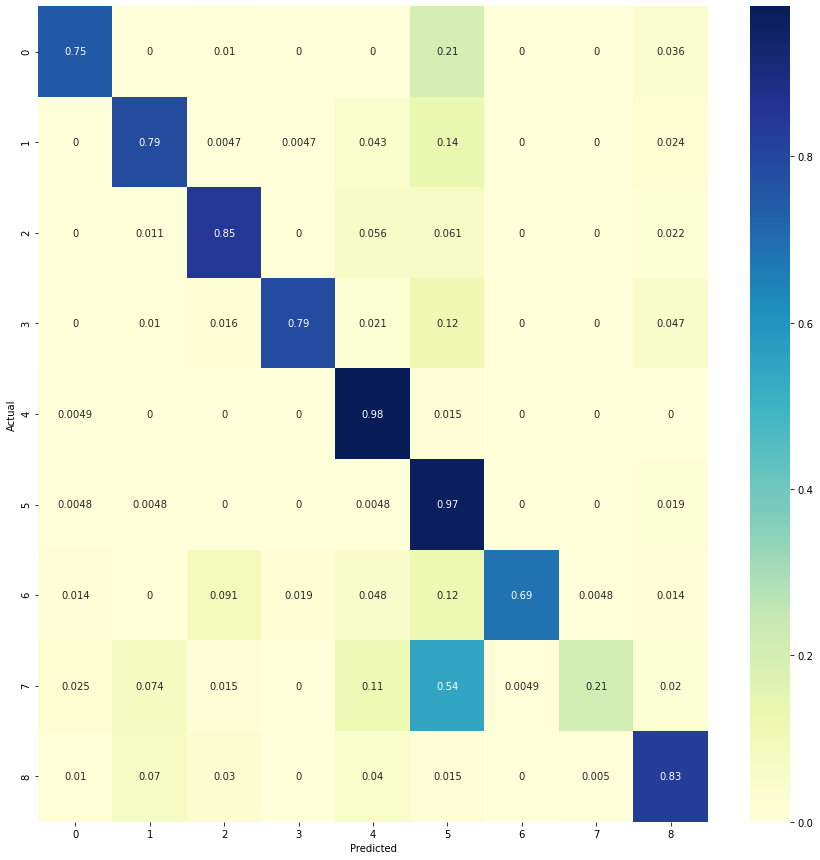

In [28]:
confusion_mtx = confusion_matrix(test.labels, pred, normalize='true') 
plt.figure(figsize=(15,15))
sns.heatmap(confusion_mtx,annot=True,annot_kws={"size": 10} , cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot()

In [29]:
print(classification_report(test.labels,pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       195
           1       0.83      0.79      0.81       211
           2       0.82      0.85      0.83       179
           3       0.97      0.79      0.87       191
           4       0.76      0.98      0.85       203
           5       0.45      0.97      0.61       207
           6       0.99      0.69      0.81       209
           7       0.96      0.21      0.35       204
           8       0.82      0.83      0.83       201

    accuracy                           0.76      1800
   macro avg       0.84      0.76      0.75      1800
weighted avg       0.83      0.76      0.75      1800

